# 🚀 Support Vector Machine on Student Performnace Dataset – Performance Prediction
🎯 Objective:
## Predict Student Performance  using a Support Vector Machine (SVM) classifier.

📂 Dataset:
Student_performance_ dataset (Kaggle or CSV) with the target variable 

✅ SVM Classification Model
✅ Accuracy Score & Classification Report
✅ 3D Decision Boundary Plot using SVM
✅ Model Saved using Joblib



# 1. Import Necessary Libraries

In [9]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns 

import matplotlib.pyplot as plt 

# 2. Load Dataset

In [45]:
df = pd.read_csv("student_performance_dataset (1).csv")

In [46]:
df

,Gender,Parental Education Level,Your Interest,Test Preparation,Hours Studied,Attendance,Class Group,Performance
0,Male,High School,Music,Completed,4.7,83.6,B,Excellent
1,Male,Doctorate,Reading and Literature,Completed,5.0,100.0,D,Excellent
2,Male,High School,Arts & Creativity,Completed,3.6,72.7,E,Average
3,Male,Master’s Degree,Technology and Computers,NaN,4.9,92.7,E,Excellent
4,Female,Some College,Sports & Athletics,Completed,3.3,80.4,A,Good
...,...,...,...,...,...,...,...,...
995,Female,Bachelor’s Degree,Technology and Computers,NaN,3.7,82.5,C,Good
996,Female,Doctorate,Reading and Literature,Completed,5.8,92.1,A,Excellent
997,Male,Some College,Music,Completed,4.5,95.7,C,Excellent
998,Female,Doctorate,Music,NaN,2.5,66.2,D,Average


# 3. Separate the Independent variable and dependent variable 

In [47]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [48]:
X 

,Gender,Parental Education Level,Your Interest,Test Preparation,Hours Studied,Attendance,Class Group,Performance
0,Male,High School,Music,Completed,4.7,83.6,B,Excellent
1,Male,Doctorate,Reading and Literature,Completed,5.0,100.0,D,Excellent
2,Male,High School,Arts & Creativity,Completed,3.6,72.7,E,Average
3,Male,Master’s Degree,Technology and Computers,NaN,4.9,92.7,E,Excellent
4,Female,Some College,Sports & Athletics,Completed,3.3,80.4,A,Good
...,...,...,...,...,...,...,...,...
995,Female,Bachelor’s Degree,Technology and Computers,NaN,3.7,82.5,C,Good
996,Female,Doctorate,Reading and Literature,Completed,5.8,92.1,A,Excellent
997,Male,Some College,Music,Completed,4.5,95.7,C,Excellent
998,Female,Doctorate,Music,NaN,2.5,66.2,D,Average


In [49]:
y

0      Excellent
1      Excellent
2        Average
3      Excellent
4           Good
         ...    
995         Good
996    Excellent
997    Excellent
998      Average
999      Average
Name: Performance, Length: 1000, dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1000 non-null   object 
 1   Parental Education Level  1000 non-null   object 
 2   Your Interest             1000 non-null   object 
 3   Test Preparation          586 non-null    object 
 4   Hours Studied             1000 non-null   float64
 5   Attendance                1000 non-null   float64
 6   Class Group               1000 non-null   object 
 7   Performance               1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [51]:
df['Test Preparation'].value_counts()


Test Preparation
Completed    586
Name: count, dtype: int64

In [52]:
df['Test Preparation'] = df['Test Preparation'].fillna('Unknown')


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1000 non-null   object 
 1   Parental Education Level  1000 non-null   object 
 2   Your Interest             1000 non-null   object 
 3   Test Preparation          1000 non-null   object 
 4   Hours Studied             1000 non-null   float64
 5   Attendance                1000 non-null   float64
 6   Class Group               1000 non-null   object 
 7   Performance               1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


# 4. Exploratory Data Analysis 

## Correaltion Between Numerical vs numerical Feature

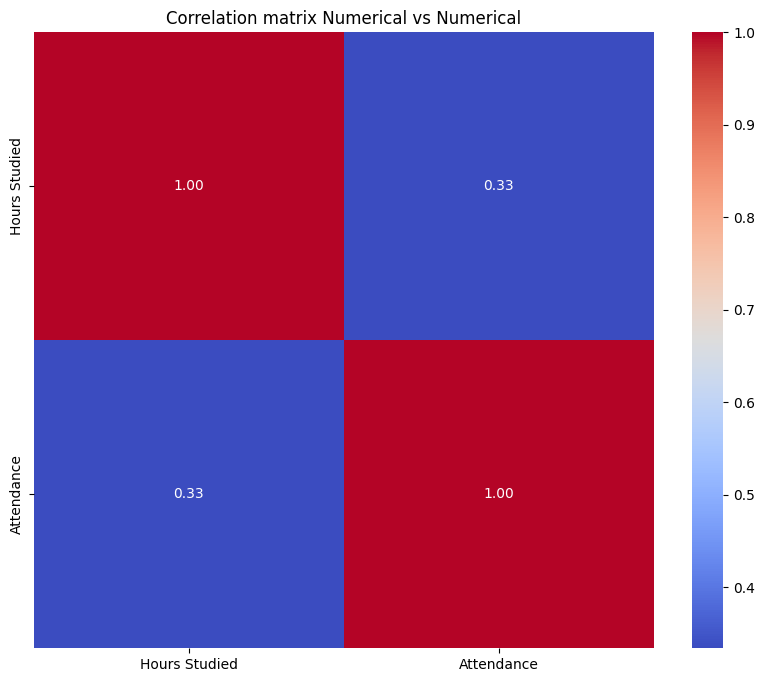

In [201]:
df_numeric = df.select_dtypes(include = 'number')
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix Numerical vs Numerical")
plt.show()

## Distribution of Numeric columns so that i can use Scaling technique it is standard scaler or Minmaxscaler 

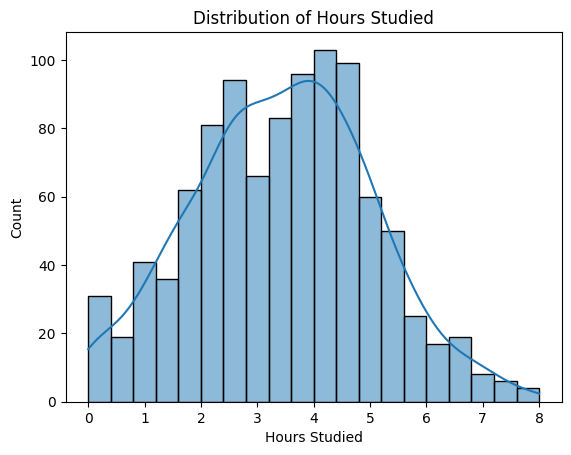

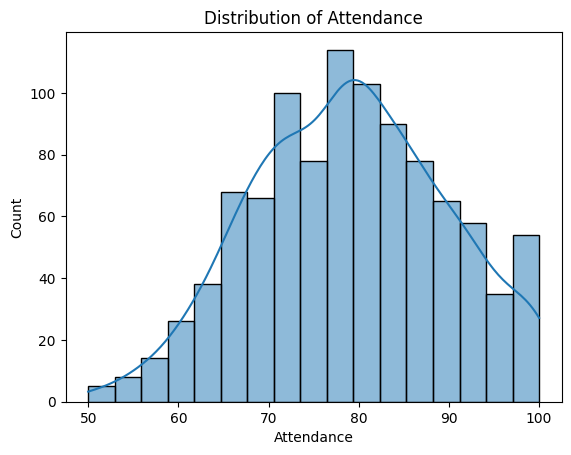

In [202]:


for col in df_numeric:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 5. encode the Target Variable

In [54]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
v = label.fit_transform(y)

In [55]:
v

array([2, 2, 0, 2, 3, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 3, 1, 3, 0, 0, 2, 3,
       1, 3, 3, 0, 3, 3, 1, 3, 0, 1, 3, 0, 3, 2, 3, 1, 0, 1, 3, 3, 0, 3,
       0, 2, 0, 0, 2, 0, 1, 1, 3, 2, 3, 1, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 0, 2, 1, 2, 1, 3, 0, 0, 3, 2, 0, 0, 2, 3, 2, 0, 0, 0, 2,
       3, 2, 0, 0, 3, 2, 1, 0, 3, 0, 0, 1, 3, 2, 4, 3, 2, 3, 2, 3, 0, 0,
       2, 0, 0, 0, 3, 0, 0, 2, 1, 3, 1, 3, 0, 1, 2, 0, 2, 1, 2, 2, 0, 4,
       0, 2, 0, 2, 2, 0, 3, 0, 2, 3, 2, 3, 3, 0, 0, 3, 2, 3, 0, 2, 3, 3,
       0, 0, 3, 2, 2, 0, 2, 3, 1, 2, 2, 0, 3, 2, 1, 3, 0, 0, 0, 1, 1, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 0, 3, 2, 2, 3, 2, 1, 1, 0, 2, 0, 0, 0, 3,
       1, 3, 1, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 0, 3, 0, 3, 4, 3, 2, 3, 1,
       2, 1, 1, 3, 1, 3, 0, 0, 1, 1, 2, 0, 3, 3, 0, 1, 0, 2, 3, 2, 0, 1,
       1, 1, 2, 3, 0, 2, 0, 1, 2, 0, 1, 0, 0, 3, 0, 3, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 0, 0, 2, 3, 2, 1, 2, 0, 3, 2, 3, 1, 3, 2, 0, 2, 1, 1, 2,
       0, 3, 3, 0, 3, 2, 2, 0, 3, 3, 3, 2, 0, 0, 3,

# 6. Divide the Dataset into Training and Testing datset

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,v,test_size=0.2,random_state=42)

In [57]:
y_train

array([3, 3, 0, 0, 1, 0, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 1, 1, 1, 3, 2, 0,
       0, 0, 0, 0, 0, 3, 1, 3, 2, 0, 3, 4, 0, 1, 0, 1, 0, 3, 2, 0, 3, 0,
       0, 0, 1, 3, 0, 0, 3, 3, 1, 2, 3, 1, 2, 2, 0, 0, 1, 3, 0, 0, 3, 1,
       3, 0, 3, 2, 3, 1, 2, 2, 3, 1, 0, 1, 2, 2, 1, 4, 2, 3, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 3, 2, 3, 0, 2, 2, 1, 1, 1, 3,
       0, 0, 1, 3, 0, 0, 1, 0, 3, 3, 0, 2, 3, 2, 3, 2, 0, 3, 1, 2, 0, 2,
       3, 1, 2, 0, 3, 2, 0, 1, 3, 2, 0, 0, 1, 3, 3, 2, 0, 4, 3, 0, 1, 0,
       2, 4, 3, 1, 1, 3, 3, 0, 2, 0, 2, 1, 0, 2, 0, 0, 3, 2, 2, 1, 0, 2,
       0, 1, 0, 3, 3, 0, 2, 0, 2, 2, 2, 0, 1, 2, 3, 3, 2, 0, 1, 2, 0, 3,
       0, 2, 3, 0, 2, 0, 3, 0, 0, 3, 1, 2, 2, 0, 1, 3, 0, 2, 3, 2, 1, 2,
       0, 2, 0, 3, 2, 3, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 3, 0, 3, 3,
       3, 3, 3, 2, 0, 3, 2, 1, 2, 3, 2, 2, 0, 0, 2, 3, 1, 3, 3, 0, 0, 1,
       3, 2, 3, 0, 3, 0, 3, 3, 3, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 3, 0, 3,
       0, 3, 2, 0, 1, 0, 1, 3, 0, 0, 2, 0, 0, 0, 3,

In [58]:
y_test

array([2, 0, 2, 2, 2, 3, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 1, 2, 0, 3, 3, 3,
       0, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 2, 3, 2,
       0, 3, 2, 2, 3, 2, 3, 2, 2, 0, 3, 1, 1, 2, 1, 1, 3, 3, 3, 1, 0, 0,
       2, 2, 2, 3, 0, 3, 2, 1, 0, 3, 1, 3, 2, 1, 3, 0, 2, 4, 3, 0, 1, 0,
       3, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 1, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2,
       3, 3, 0, 1, 1, 4, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 0, 0, 2, 3, 0,
       0, 3, 2, 0, 3, 2, 1, 1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 3, 2, 0, 2, 0,
       0, 2, 0, 4, 3, 3, 3, 2, 3, 0, 3, 0, 0, 3, 3, 0, 2, 3, 0, 2, 0, 2,
       3, 2])

# 7. import Necessary Algorithm

In [169]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# 8. Using Column Transformer for transforming each Column

In [170]:
numerical_columns = ['Hours Studied','Attendance']
onehot_columns = ['Test Preparation','Your Interest','Gender','Class Group']  
ordinal_columns = ['Parental Education Level'] 

In [171]:
education_categories = [['High School', 'Some College','Bachelor’s Degree', 'Master’s Degree','Associate Degree','Doctorate']]


In [172]:
numerical_scaling = StandardScaler()
onehot_encoding = OneHotEncoder(handle_unknown='ignore',drop='first')  
ordinal_encoding = OrdinalEncoder(categories=education_categories)


In [211]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_scaling, numerical_columns),
        ('onehot', onehot_encoding, onehot_columns),
        ('ordinal', ordinal_encoding, ordinal_columns)
    ])


In [212]:
from sklearn.svm import SVC

# 9. Using Pipeline For multiple process

In [213]:
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('classifier', SVC(kernel='rbf', degree=5, gamma='scale',shrinking=True, probability=False))
])

In [214]:
h = pipeline.fit(X_train,y_train)


In [215]:
y_pred = pipeline.predict(X_test)

In [216]:
y_pred


array([2, 0, 2, 2, 2, 3, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 3, 1, 0, 2, 2, 1, 2, 0, 3, 3, 3,
       0, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 1, 3, 0, 3, 0, 2, 0, 2,
       0, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 1, 1, 2, 1, 0, 3, 3, 3, 1, 0, 0,
       2, 2, 2, 3, 0, 3, 2, 1, 0, 3, 1, 3, 2, 1, 3, 0, 2, 1, 0, 0, 1, 0,
       3, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 1, 2, 1, 2, 0, 2, 3, 3, 3, 2, 2,
       3, 3, 0, 1, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 0, 0, 0, 2, 3, 0,
       1, 3, 2, 0, 3, 2, 1, 1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 2, 0,
       0, 2, 0, 1, 3, 3, 0, 2, 3, 0, 3, 0, 0, 3, 3, 0, 2, 3, 0, 2, 0, 2,
       3, 2])

In [217]:
y_test

array([2, 0, 2, 2, 2, 3, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 1, 2, 0, 3, 3, 3,
       0, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 2, 3, 2,
       0, 3, 2, 2, 3, 2, 3, 2, 2, 0, 3, 1, 1, 2, 1, 1, 3, 3, 3, 1, 0, 0,
       2, 2, 2, 3, 0, 3, 2, 1, 0, 3, 1, 3, 2, 1, 3, 0, 2, 4, 3, 0, 1, 0,
       3, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 1, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2,
       3, 3, 0, 1, 1, 4, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 0, 0, 2, 3, 0,
       0, 3, 2, 0, 3, 2, 1, 1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 3, 2, 0, 2, 0,
       0, 2, 0, 4, 3, 3, 3, 2, 3, 0, 3, 0, 0, 3, 3, 0, 2, 3, 0, 2, 0, 2,
       3, 2])

# 10. Check accuracy withoutr using PCA

In [218]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.915


# 11. Plot 3D

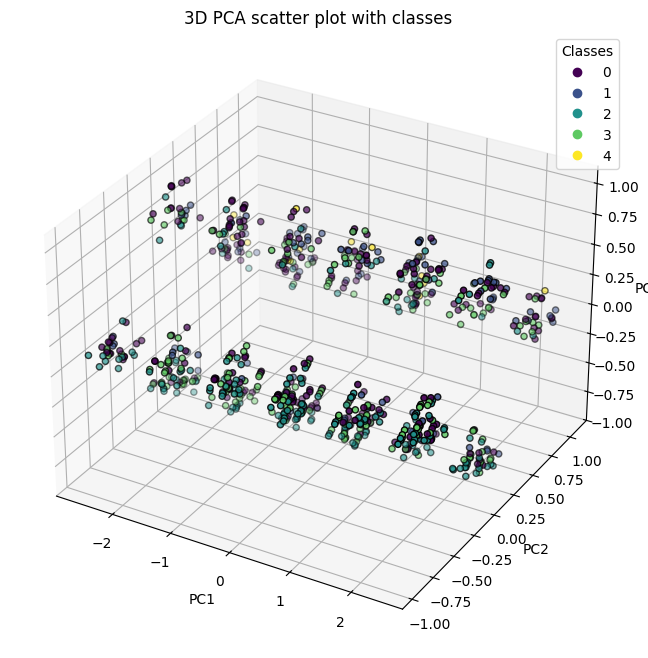

In [219]:
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_train_pca[:,0], X_train_pca[:,1], X_train_pca[:,2], c=y, cmap='viridis', edgecolor='k')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('3D PCA scatter plot with classes')
plt.show()

# 12. Using PCA 

In [185]:
pipeline2 = Pipeline(
    [('preprocessor',preprocessor),
     ('pca', PCA(n_components=2)),
     ('classifier', SVC(kernel='rbf', degree=5, gamma='scale',shrinking=True, probability=False))
])

In [186]:
l = pipeline2.fit(X_train,y_train)

In [187]:
y_pred = l.predict(X_test)

In [188]:
y_pred

array([2, 0, 2, 2, 2, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 3, 1, 0, 2, 2, 1, 2, 0, 3, 3, 3,
       0, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 0, 3, 3, 1, 3, 0, 3, 0, 2, 3, 2,
       0, 3, 2, 2, 3, 2, 3, 2, 2, 0, 3, 1, 1, 2, 1, 0, 3, 3, 0, 1, 1, 0,
       2, 2, 2, 3, 0, 3, 2, 1, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 3, 1, 1, 3,
       3, 3, 0, 0, 0, 1, 0, 3, 0, 3, 0, 1, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2,
       3, 3, 0, 1, 1, 4, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 0, 0, 2, 3, 0,
       0, 3, 2, 0, 3, 2, 1, 1, 0, 3, 0, 1, 0, 3, 3, 0, 0, 3, 2, 0, 2, 0,
       0, 2, 0, 4, 3, 3, 3, 2, 3, 0, 3, 0, 0, 3, 2, 0, 2, 3, 0, 2, 0, 2,
       3, 2])

In [189]:
y_test

array([2, 0, 2, 2, 2, 3, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 1, 2, 0, 3, 3, 3,
       0, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 2, 3, 2,
       0, 3, 2, 2, 3, 2, 3, 2, 2, 0, 3, 1, 1, 2, 1, 1, 3, 3, 3, 1, 0, 0,
       2, 2, 2, 3, 0, 3, 2, 1, 0, 3, 1, 3, 2, 1, 3, 0, 2, 4, 3, 0, 1, 0,
       3, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 1, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2,
       3, 3, 0, 1, 1, 4, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 0, 0, 2, 3, 0,
       0, 3, 2, 0, 3, 2, 1, 1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 3, 2, 0, 2, 0,
       0, 2, 0, 4, 3, 3, 3, 2, 3, 0, 3, 0, 0, 3, 3, 0, 2, 3, 0, 2, 0, 2,
       3, 2])

In [190]:
X_train_processed2 = pipeline2.named_steps['preprocessor'].transform(X_train)
X_train_pca2 = pipeline2.named_steps['pca'].transform(X_train_processed)
y2 = y_train


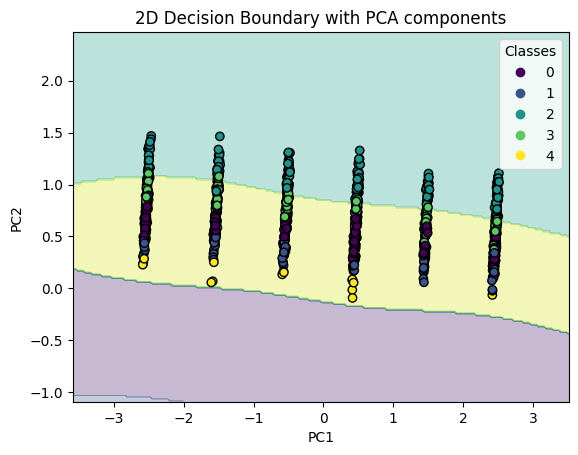

In [191]:
x_min, x_max = X_train_pca2[:, 0].min() - 1, X_train_pca2[:, 0].max() + 1
y_min, y_max = X_train_pca2[:, 1].min() - 1, X_train_pca2[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict classes for each point in the grid
Z = pipeline2.named_steps['classifier'].predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary and training points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Decision Boundary with PCA components')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()

# 13. Check Accuracy After using PCA

In [192]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.91      0.90        57\n           1       0.89      0.89      0.89        27\n           2       0.96      0.96      0.96        54\n           3       0.91      0.90      0.91        59\n           4       1.00      0.67      0.80         3\n\n    accuracy                           0.92       200\n   macro avg       0.93      0.87      0.89       200\nweighted avg       0.92      0.92      0.91       200\n'

In [193]:
print("Train categories:", X_train['Parental Education Level'].unique())

Train categories: ['Some College' 'High School' 'Doctorate' 'Associate Degree'
 'Master’s Degree' 'Bachelor’s Degree']


# 14. Preduct new input Variable

In [194]:
new_input =pd.DataFrame([['Male','High School','Music','completed',7,79.5,'D']],columns=['Gender','Parental Education Level','Your Interest','Test Preparation','Hours Studied','Attendance','Class Group'])

In [195]:
new_output = pipeline.predict(new_input)

C:\Users\ARSHPREET KAUR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [196]:
new_output

array([2])

In [197]:
import joblib
joblib.dump(pipeline, 'svm_model.joblib')


['svm_model.joblib']